In [736]:
import xgboost as xgb
import pandas as pd
import numpy as np
import catboost as cb
import shap
import sklearn
import matplotlib.pyplot as plt; plt.style.use('seaborn')
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image
from imblearn.over_sampling import SMOTE 
import pydotplus 
from sklearn.model_selection import train_test_split
smo = SMOTE()

In [737]:
data = pd.read_csv('3_train_data.csv')
cols = data.columns[1:730]

In [738]:
train_data = data[cols]
train_data

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,33,...,439.218115,64.771680,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166
1,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,37,...,467.249415,68.960024,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174
2,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,29,...,463.181729,68.748923,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176
3,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,37,...,467.249415,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174
4,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,31,...,461.202465,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,0,1.8193,3.309852,177.6817,89.159790,24,24,73,43,30,...,598.166139,88.709996,2.063023,25.470481,21.946991,0.000000,7121,70,2.526,236
1970,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,...,570.134839,84.662088,2.064929,24.928962,21.405589,0.000000,6171,66,1.884,228
1971,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,...,570.134839,84.660642,2.064894,24.923083,21.400883,0.000000,6421,66,1.884,228
1972,0,1.3365,1.786232,125.5605,63.287860,18,18,51,31,20,...,436.098059,64.171346,2.070043,19.841924,16.326873,0.000000,2583,50,0.782,174


In [739]:
model_1 = cb.CatBoostClassifier(iterations=500, depth=5, learning_rate=0.05, loss_function='Logloss',
                              logging_level='Verbose')
X_train, X_test, Y_train, Y_test =train_test_split(train_data, data['Caco-2'].values, test_size=0.2, shuffle=True)
model_1.fit(X_train, Y_train)
rf_roc_auc_1 = roc_auc_score(Y_test, model_1.predict(X_test))
print ("cat AUC = %2.2f" % rf_roc_auc_1)


0:	learn: 0.6455275	total: 9.78ms	remaining: 4.88s
1:	learn: 0.6090425	total: 19.1ms	remaining: 4.75s
2:	learn: 0.5779783	total: 27.7ms	remaining: 4.59s
3:	learn: 0.5487196	total: 36.7ms	remaining: 4.55s
4:	learn: 0.5230574	total: 46ms	remaining: 4.55s
5:	learn: 0.4967506	total: 54.8ms	remaining: 4.51s
6:	learn: 0.4752420	total: 64ms	remaining: 4.51s
7:	learn: 0.4585692	total: 72.6ms	remaining: 4.46s
8:	learn: 0.4366505	total: 81.3ms	remaining: 4.43s
9:	learn: 0.4244368	total: 90.3ms	remaining: 4.43s
10:	learn: 0.4111211	total: 99.3ms	remaining: 4.42s
11:	learn: 0.3959104	total: 111ms	remaining: 4.51s
12:	learn: 0.3847945	total: 119ms	remaining: 4.47s
13:	learn: 0.3744042	total: 128ms	remaining: 4.46s
14:	learn: 0.3627547	total: 138ms	remaining: 4.46s
15:	learn: 0.3526711	total: 146ms	remaining: 4.43s
16:	learn: 0.3450163	total: 156ms	remaining: 4.42s
17:	learn: 0.3379863	total: 164ms	remaining: 4.4s
18:	learn: 0.3300056	total: 173ms	remaining: 4.38s
19:	learn: 0.3236529	total: 182ms	r

167:	learn: 0.1244512	total: 1.64s	remaining: 3.24s
168:	learn: 0.1241488	total: 1.65s	remaining: 3.23s
169:	learn: 0.1235842	total: 1.66s	remaining: 3.22s
170:	learn: 0.1230130	total: 1.67s	remaining: 3.21s
171:	learn: 0.1221187	total: 1.68s	remaining: 3.2s
172:	learn: 0.1215935	total: 1.69s	remaining: 3.19s
173:	learn: 0.1210404	total: 1.7s	remaining: 3.18s
174:	learn: 0.1205292	total: 1.7s	remaining: 3.17s
175:	learn: 0.1198575	total: 1.71s	remaining: 3.15s
176:	learn: 0.1193243	total: 1.72s	remaining: 3.14s
177:	learn: 0.1183955	total: 1.73s	remaining: 3.13s
178:	learn: 0.1176287	total: 1.74s	remaining: 3.12s
179:	learn: 0.1168439	total: 1.75s	remaining: 3.11s
180:	learn: 0.1164851	total: 1.76s	remaining: 3.1s
181:	learn: 0.1159697	total: 1.77s	remaining: 3.09s
182:	learn: 0.1158965	total: 1.78s	remaining: 3.08s
183:	learn: 0.1151361	total: 1.79s	remaining: 3.07s
184:	learn: 0.1144347	total: 1.8s	remaining: 3.06s
185:	learn: 0.1137783	total: 1.81s	remaining: 3.05s
186:	learn: 0.113

337:	learn: 0.0577494	total: 3.43s	remaining: 1.64s
338:	learn: 0.0574988	total: 3.44s	remaining: 1.63s
339:	learn: 0.0573632	total: 3.45s	remaining: 1.62s
340:	learn: 0.0569146	total: 3.46s	remaining: 1.61s
341:	learn: 0.0566740	total: 3.47s	remaining: 1.6s
342:	learn: 0.0565261	total: 3.48s	remaining: 1.59s
343:	learn: 0.0562333	total: 3.49s	remaining: 1.58s
344:	learn: 0.0560094	total: 3.5s	remaining: 1.57s
345:	learn: 0.0555950	total: 3.51s	remaining: 1.56s
346:	learn: 0.0553341	total: 3.52s	remaining: 1.55s
347:	learn: 0.0549563	total: 3.53s	remaining: 1.54s
348:	learn: 0.0547523	total: 3.54s	remaining: 1.53s
349:	learn: 0.0544731	total: 3.56s	remaining: 1.52s
350:	learn: 0.0542845	total: 3.56s	remaining: 1.51s
351:	learn: 0.0542343	total: 3.57s	remaining: 1.5s
352:	learn: 0.0542198	total: 3.58s	remaining: 1.49s
353:	learn: 0.0542049	total: 3.59s	remaining: 1.48s
354:	learn: 0.0541576	total: 3.6s	remaining: 1.47s
355:	learn: 0.0539841	total: 3.62s	remaining: 1.46s
356:	learn: 0.05

In [ ]:
# cat = cb.CatBoostClassifier(iterations=500, depth=4, learning_rate=0.05, loss_function='CrossEntropy',
#                               logging_level='Verbose',random_state = 0)
# X_train, X_test, Y_train, Y_test =train_test_split(data[feat_names[list(index)][:m]], data[''].values, test_size=0.2, shuffle=True)
# model = rf
# smo_x, smo_y = smo.fit_resample(data[feat_names[list(index)][:1]],data['hERG'].values) #smote
# model_test=  model.fit(smo_x,smo_y)
# rf_roc_auc_1 = roc_auc_score(Y_test, model_test.predict(X_test))
# print ("cat AUC = %2.2f" % rf_roc_auc_1)

In [742]:
cat = cb.CatBoostClassifier(iterations=500, depth=4, learning_rate=0.05, loss_function='CrossEntropy',
                              logging_level='Verbose',random_state = 0)
def get_feat_imort(model,name):
    model_1 = model.fit(data[cols], data[name].values)
    importances = model_1.feature_importances_
    feat_names = cols
    # 排序 返回索引
    indices = np.argsort(importances)[::-1] 
    return indices
index = get_feat_imort(cat,'Caco-2') 

0:	learn: 0.6544230	total: 5.79ms	remaining: 2.89s
1:	learn: 0.6173532	total: 11.3ms	remaining: 2.81s
2:	learn: 0.5875011	total: 16.5ms	remaining: 2.73s
3:	learn: 0.5591521	total: 21.9ms	remaining: 2.72s
4:	learn: 0.5339117	total: 27.5ms	remaining: 2.72s
5:	learn: 0.5129698	total: 32.6ms	remaining: 2.69s
6:	learn: 0.4869200	total: 38ms	remaining: 2.67s
7:	learn: 0.4680114	total: 43.4ms	remaining: 2.67s
8:	learn: 0.4477050	total: 48.5ms	remaining: 2.65s
9:	learn: 0.4320885	total: 53.8ms	remaining: 2.63s
10:	learn: 0.4221864	total: 59.3ms	remaining: 2.64s
11:	learn: 0.4115147	total: 64.4ms	remaining: 2.62s
12:	learn: 0.3998857	total: 69.8ms	remaining: 2.61s
13:	learn: 0.3880454	total: 75.3ms	remaining: 2.61s
14:	learn: 0.3800049	total: 81.2ms	remaining: 2.63s
15:	learn: 0.3725190	total: 86.6ms	remaining: 2.62s
16:	learn: 0.3657502	total: 92.2ms	remaining: 2.62s
17:	learn: 0.3595481	total: 97.3ms	remaining: 2.6s
18:	learn: 0.3531627	total: 103ms	remaining: 2.6s
19:	learn: 0.3460822	total:

189:	learn: 0.1488149	total: 1.05s	remaining: 1.72s
190:	learn: 0.1481995	total: 1.06s	remaining: 1.72s
191:	learn: 0.1481286	total: 1.07s	remaining: 1.71s
192:	learn: 0.1476709	total: 1.07s	remaining: 1.71s
193:	learn: 0.1475951	total: 1.08s	remaining: 1.7s
194:	learn: 0.1475197	total: 1.08s	remaining: 1.7s
195:	learn: 0.1468342	total: 1.09s	remaining: 1.69s
196:	learn: 0.1462128	total: 1.1s	remaining: 1.69s
197:	learn: 0.1461289	total: 1.1s	remaining: 1.68s
198:	learn: 0.1453395	total: 1.11s	remaining: 1.68s
199:	learn: 0.1452569	total: 1.12s	remaining: 1.68s
200:	learn: 0.1445427	total: 1.12s	remaining: 1.67s
201:	learn: 0.1440673	total: 1.13s	remaining: 1.67s
202:	learn: 0.1438834	total: 1.13s	remaining: 1.66s
203:	learn: 0.1432739	total: 1.14s	remaining: 1.65s
204:	learn: 0.1428667	total: 1.15s	remaining: 1.65s
205:	learn: 0.1422304	total: 1.15s	remaining: 1.64s
206:	learn: 0.1421435	total: 1.16s	remaining: 1.64s
207:	learn: 0.1415853	total: 1.16s	remaining: 1.63s
208:	learn: 0.14

367:	learn: 0.0819879	total: 2.1s	remaining: 755ms
368:	learn: 0.0814744	total: 2.11s	remaining: 750ms
369:	learn: 0.0811493	total: 2.12s	remaining: 744ms
370:	learn: 0.0810000	total: 2.12s	remaining: 738ms
371:	learn: 0.0808912	total: 2.13s	remaining: 733ms
372:	learn: 0.0806116	total: 2.14s	remaining: 728ms
373:	learn: 0.0802740	total: 2.14s	remaining: 722ms
374:	learn: 0.0800917	total: 2.15s	remaining: 717ms
375:	learn: 0.0799280	total: 2.15s	remaining: 711ms
376:	learn: 0.0797353	total: 2.16s	remaining: 705ms
377:	learn: 0.0795568	total: 2.17s	remaining: 700ms
378:	learn: 0.0793419	total: 2.17s	remaining: 694ms
379:	learn: 0.0791885	total: 2.18s	remaining: 689ms
380:	learn: 0.0789127	total: 2.19s	remaining: 683ms
381:	learn: 0.0787769	total: 2.19s	remaining: 677ms
382:	learn: 0.0785489	total: 2.2s	remaining: 672ms
383:	learn: 0.0782158	total: 2.2s	remaining: 666ms
384:	learn: 0.0779996	total: 2.21s	remaining: 660ms
385:	learn: 0.0777959	total: 2.21s	remaining: 654ms
386:	learn: 0.0

In [694]:
model = rf
l =[]
for i in range(1,80,3):
    l.append(np.mean(smote(model,index,i,'Caco-2')))
    print (str(i)+"个特征："+"5折AUC = %2.2f" % np.mean(smote(model,indices,i,'Caco-2')))


1个特征：5折AUC = 0.72
4个特征：5折AUC = 0.80
7个特征：5折AUC = 0.81
10个特征：5折AUC = 0.80
13个特征：5折AUC = 0.82
16个特征：5折AUC = 0.82
19个特征：5折AUC = 0.82
22个特征：5折AUC = 0.82
25个特征：5折AUC = 0.84
28个特征：5折AUC = 0.83
31个特征：5折AUC = 0.84
34个特征：5折AUC = 0.84
37个特征：5折AUC = 0.84
40个特征：5折AUC = 0.83
43个特征：5折AUC = 0.84
46个特征：5折AUC = 0.84
49个特征：5折AUC = 0.84
52个特征：5折AUC = 0.84
55个特征：5折AUC = 0.85
58个特征：5折AUC = 0.84
61个特征：5折AUC = 0.84
64个特征：5折AUC = 0.84
67个特征：5折AUC = 0.84
70个特征：5折AUC = 0.85
73个特征：5折AUC = 0.85
76个特征：5折AUC = 0.84
79个特征：5折AUC = 0.85


In [726]:
q = []
for i in range(1,80,3):
    q.append(i)

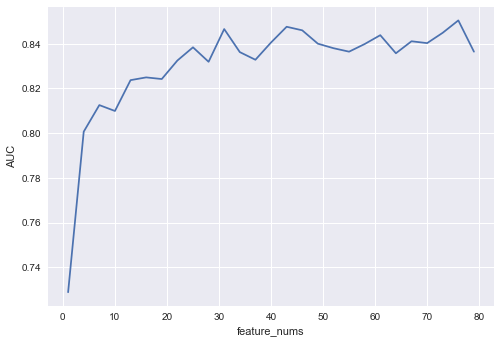

In [727]:
plt.plot(q,l)
# plt.title('feature_nums vs AUC')
plt.ylabel("AUC")
plt.xlabel("feature_nums")
# my_x_ticks = np.arange(0, 179, 10)#原始数据有13个点，故此处为设置从0开始，间隔为1
# plt.xticks(my_x_ticks)
plt.savefig('Caco-2')



In [745]:
# 实例化随机森林
rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=80, 
    random_state =0,
    max_depth=None, # 定义树的深度, 可以用来防止过拟合
    min_samples_split=5, # 定义至少多少个样本的情况下才继续分叉
    #min_weight_fraction_leaf=0.01 # 定义叶子节点最少需要包含多少个样本(使用百分比表达), 防止过拟合
    )

In [746]:
xgbs = xgb.XGBClassifier(n_estimators=80,booster= 'gbtree',nthread= 4,num_feature=30,seed= 1000,
                 objective = 'multi:softmax',num_class=2,gamma= 0.1,max_depth=6,subsample= 0.7,
                 colsample_bytree= 0.7,min_child_weight= 3,eta= 0.1,random_state=0)

In [715]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [717]:
from sklearn import svm
clf = svm.SVC()

In [730]:
from sklearn.model_selection import KFold
m = 30
model = xgbs
name = 'Caco-2'
def no_SMOTE(model,indices,m,name):
    """
    model:定义好的模型
    indices :特征排序后的索引
    m 前m特征数量
    y_train 类别 y_train 类 Caco-2，CYP3A4，hERG，HOB，MN
    
    """
    #Sample=np.random.rand(50,15) #建立一个50行12列的随机数组
    auc_no_smote = [] 
    y_train = data[name].values
    New_sam=KFold(n_splits=5)
    train_data = data[feat_names[list(indices)][:m]]
    for train_index,test_index in New_sam.split(train_data.values):  #对Sam数据建立5折交叉验证的划分
    #for test_index,train_index in New_sam.split(Sam):  #默认第一个参数是训练集，第二个参数是测试集
        #print(train_index,test_index)
        Sam_xtrain,Sam_xtest=train_data.iloc[train_index,:],train_data.iloc[test_index]
        Sam_ytrain,Sam_ytest=y_train[train_index],y_train[test_index]
    #     print('训练集数量:',Sam_xtrain.shape,'测试集数量:',Sam_xtest.shape)  #结果表明每次划分的数量
    #     X_smo, Y_smo = smo.fit_resample(Sam_xtrain,Sam_ytrain)

        roc_auc = roc_auc_score(Sam_ytest, model.fit(Sam_xtrain, Sam_ytrain).predict(Sam_xtest))
        auc_no_smote.append(roc_auc)
    return auc_no_smote
print ("no_sm0te_5折AUC = %2.2f" % np.mean(no_SMOTE(model,indices,m,name)),no_SMOTE(model,indices,m,name))
# print ("5折各AUC:"  ,no_SMOTE(model_2,y_train))
# print(classification_report(Sam_ytest, rf_5.fit(Sam_xtrain, Sam_ytrain).predict(Sam_xtest)))

[01:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:47:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:47:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
no_sm0te_5折AUC = 0.83 [0.8199631638186842, 0.8409941631772617, 0.8301775451559933, 0.8385764306816939, 0.8419230611659634]


In [731]:
from sklearn.model_selection import KFold
    #Sample=np.random.rand(50,15) #建立一个50行12列的随机数组
m = 30
model = xgbs
name = 'Caco-2'
def smote(model,index,m,name):
    """
    model.训练模型
    m 前m特征数量
    y_train 类 Caco-2，CYP3A4，hERG，HOB，MN
 
    """
    auc_smote = [] 
    y_train = data[name].values
    train_data = data[feat_names[list(index)][:m]]
    New_sam=KFold(n_splits=5)
    for train_index,test_index in New_sam.split(train_data.values):  #对Sam数据建立5折交叉验证的划分
    #for test_index,train_index in New_sam.split(Sam):  #默认第一个参数是训练集，第二个参数是测试集
        #print(train_index,test_index)
        Sam_xtrain,Sam_xtest=train_data.iloc[train_index,:],train_data.iloc[test_index,:]
        Sam_ytrain,Sam_ytest=y_train[train_index],y_train[test_index]
    #     print('训练集数量:',Sam_xtrain.shape,'测试集数量:',Sam_xtest.shape)  #结果表明每次划分的数量
        X_smo, Y_smo = smo.fit_resample(Sam_xtrain,Sam_ytrain) #smote

        roc_auc = roc_auc_score(Sam_ytest, model.fit(X_smo, Y_smo).predict(Sam_xtest))
        auc_smote.append(roc_auc)
    return auc_smote
print ("随机森林_5折AUC = %2.2f" % np.mean(smote(model,indices,m,name)),smote(model,indices,m,name))
# print ("随机森林_5折各AUC:"  ,smote(model,y_train))
#     print(classification_report(Sam_ytest, rf_5.fit(X_smo, Y_smo).predict(Sam_xtest)))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[01:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
随机森林_5折AUC = 0.84 [0.807172823084007, 0.8317789620606522, 0.830600882594417, 0.8385764306816939, 0.8678970871399894]


In [776]:
## test_data = pd.read_csv('3_test_data.csv')
model = rf
m=25
name = 'Caco-2'
def predict_test(model,index,m,name):
    smo_x, smo_y = smo.fit_resample(data[feat_names[list(index)][:m]],data[name].values) #smote
    result = model.fit(smo_x,smo_y).predict(test_data[feat_names[list(index)][:m]])
#     result = model.fit(data[feat_names[list(index)][:m]],data[name].values).predict(test_data[feat_names[list(index)][:m]])
    return result
predict_test(model,index,m,name)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [777]:
result = predict_test(model,index,m,name)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [779]:
name

'Caco-2'

In [778]:
pd.DataFrame(result).to_csv(name+".csv")

In [761]:
cat = cb.CatBoostClassifier(iterations=500, depth=4, learning_rate=0.05, loss_function='CrossEntropy',
                              logging_level='Verbose',random_state = 0)
cat.fit(data[feat_names[list(index)][:m]],data[name].values).predict(test_data[feat_names[list(index)][:m]])

0:	learn: 0.6481099	total: 1.57ms	remaining: 786ms
1:	learn: 0.6055032	total: 2.57ms	remaining: 640ms
2:	learn: 0.5711608	total: 3.64ms	remaining: 603ms
3:	learn: 0.5407138	total: 4.63ms	remaining: 574ms
4:	learn: 0.5128903	total: 5.66ms	remaining: 560ms
5:	learn: 0.4908933	total: 6.74ms	remaining: 555ms
6:	learn: 0.4713643	total: 7.85ms	remaining: 553ms
7:	learn: 0.4545583	total: 8.95ms	remaining: 551ms
8:	learn: 0.4361544	total: 10.1ms	remaining: 552ms
9:	learn: 0.4226448	total: 11.1ms	remaining: 545ms
10:	learn: 0.4077393	total: 12.2ms	remaining: 541ms
11:	learn: 0.3971964	total: 13.2ms	remaining: 536ms
12:	learn: 0.3874913	total: 14.3ms	remaining: 534ms
13:	learn: 0.3757042	total: 15.3ms	remaining: 530ms
14:	learn: 0.3665039	total: 16.4ms	remaining: 531ms
15:	learn: 0.3594334	total: 17.5ms	remaining: 529ms
16:	learn: 0.3528831	total: 18.6ms	remaining: 529ms
17:	learn: 0.3459563	total: 19.7ms	remaining: 526ms
18:	learn: 0.3403219	total: 20.7ms	remaining: 524ms
19:	learn: 0.3324366	t

290:	learn: 0.1204686	total: 309ms	remaining: 222ms
291:	learn: 0.1202530	total: 310ms	remaining: 221ms
292:	learn: 0.1199934	total: 312ms	remaining: 220ms
293:	learn: 0.1196993	total: 313ms	remaining: 219ms
294:	learn: 0.1192884	total: 314ms	remaining: 218ms
295:	learn: 0.1191014	total: 315ms	remaining: 217ms
296:	learn: 0.1189490	total: 316ms	remaining: 216ms
297:	learn: 0.1185637	total: 317ms	remaining: 215ms
298:	learn: 0.1181356	total: 318ms	remaining: 214ms
299:	learn: 0.1177709	total: 319ms	remaining: 213ms
300:	learn: 0.1175266	total: 320ms	remaining: 212ms
301:	learn: 0.1172425	total: 321ms	remaining: 211ms
302:	learn: 0.1168996	total: 322ms	remaining: 210ms
303:	learn: 0.1167381	total: 324ms	remaining: 209ms
304:	learn: 0.1165935	total: 325ms	remaining: 207ms
305:	learn: 0.1163399	total: 326ms	remaining: 206ms
306:	learn: 0.1159387	total: 327ms	remaining: 205ms
307:	learn: 0.1155444	total: 328ms	remaining: 204ms
308:	learn: 0.1152746	total: 329ms	remaining: 203ms
309:	learn: 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)